In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/jlee0/Desktop/KYU/deep learning/kaggle/Titanic/data/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()  #total null값을 계산하기 위함

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### How many Survived?

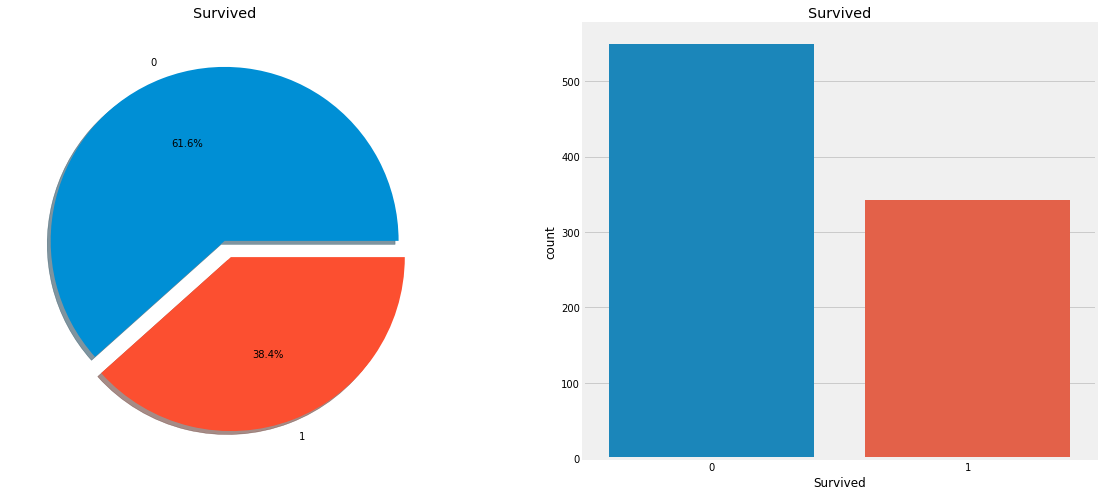

In [6]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)  #value_counts : 어떤 column안에 있는 특정 데이터의 수를 count 해주는 것
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

전체 인원의 38.4%만이 생존했다는 사실을 알 수 있다. 

앞으로의 분석에서는 어떤 feature가 생존에 영향을 주었는지, 얼마나 주었는지를 분석하고자 한다.

### Data Type

1. Categorical Features : Sex, Embarked와 같이 카테고리별로 분류될 수 있으면서 순서나 등급이 없는 데이터 타입을 의미한다.

2. Ordinal Features : Pclass와 같이 카테고리별로 분류될 수 있으면서 순서나 등급이 존재하는 데이터 타입을 의미한다.

3. Continous Feautures : Age와 같이 연속적인 값을 갖는 데이터를 의미한다.

### Analysis Features

1. Categorical

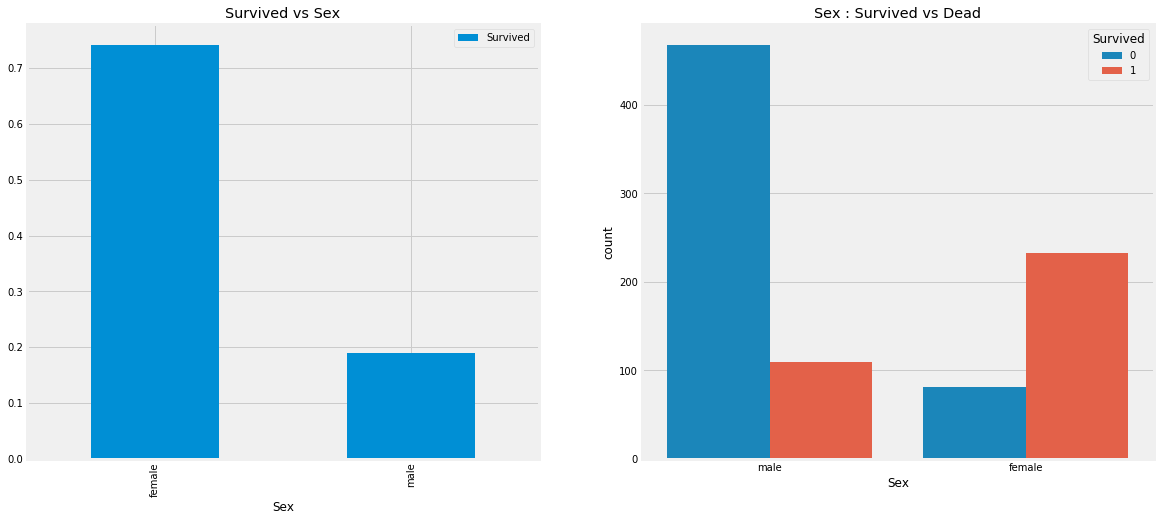

In [7]:
data.groupby(['Sex','Survived'])['Survived'].count()  #groupby : groupby([a,b])는 a,b에 대해서 data의 통계량을 구하는 것이다. 
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

남성이 여성보다 배에 많이 탑승하였고, 여성이 남성보다 높은 생존률을 갖는다고 확인할 수 있다.

--> 매우 중요한 분석!

### Categorical data

2. Pclass

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')  #데이터를 표로 재구성하는 것. 그리고 그 정도를 색의 진하기로 나타낸다.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


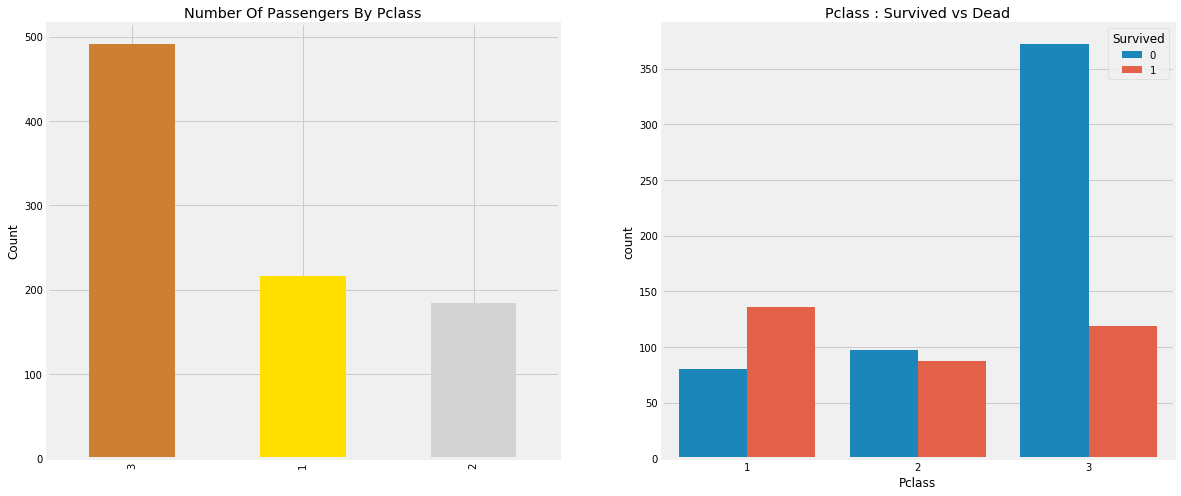

In [9]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

3등석 사람들이 가장 많았지만 가장 많이 사망한 것으로 나타난다. Pclass가 낮을수록 생존률이 높았다는 것을 확인할 수 있다.

#### Sex & Pclass

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins = True).style.background_gradient(cmap='summer_r')

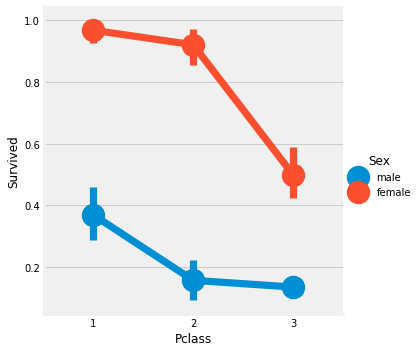

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

Pclass3의 female과 Pclass1의 male을 비교했을 때 전자가 생존확률이 더 높은 것을 알 수 있다. 

--> Sex보다 Pclass가 더 유의미한 지표이다.(분석의 중요성!)

### Continous Feature

    3.Age

In [12]:
print('Oldest Passenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:', data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


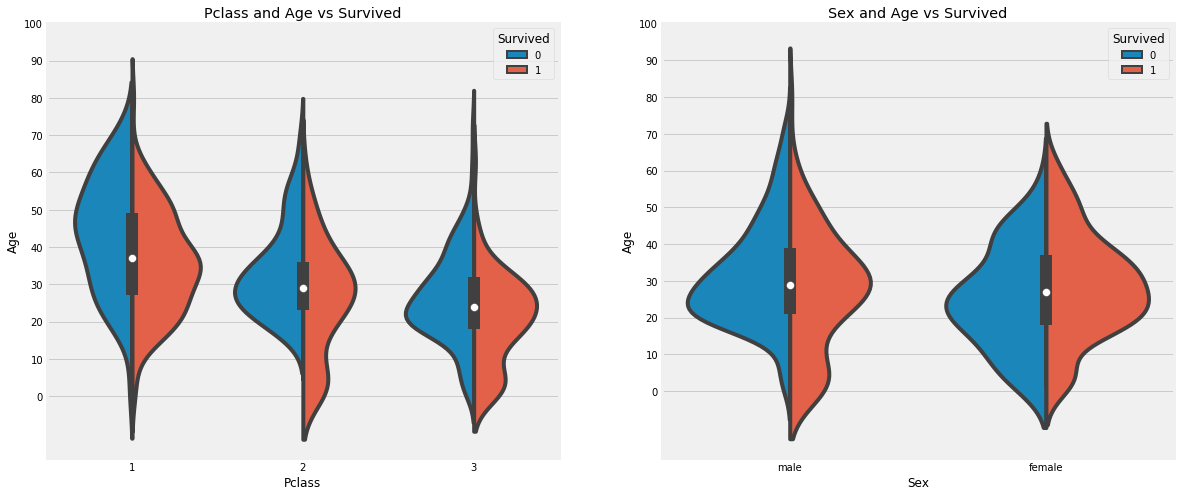

In [13]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue = "Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue = "Survived",data = data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Null Data 

Age 섹션에서 177개의 Null값을 확인할 수 있었다. 이를 해결하기 위해서 Null값을 나머지 사람들의 Age_mean값으로 채워도 되지만 이런 경우에는 사실 4살의 어린 아이가 29살이라는 값을 부여받게 된다.

--> 이를 해결하기 위해 이름을 살펴본다. 만약 앞에 Mr. 이나 Mrs. 같은 내용이 붙는다면 혹은 붙지 않는다면에 따라 다른 평균치를 채울 수 있을 것이다.

In [14]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')  #([A-Za-z]+)\. : A~Z와 a~z사이의 문자를 뽑고 .로 마무리되는 문자열을 추춘하는 것이다. Mr. Mrs.를 뽑기에 좋음

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mile과 Mme 값은 값들은 Miss를 잘못 스펠링 한 것이다. --> 값 변환을 시켜주자

In [16]:
data['Initial'].replace(['Mile','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
#inplace = True : 새로운 객체를 생성하지 않고 기존 객체를 수정하는 과정
#data.replace : 결측값을 다른 값으로 교체하기

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.831081
Mlle      24.000000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### 결측치 채우기

In [18]:
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'),'Age'] = 33  #Age값은 null이면서 Initial은 Mr인 부분의 Age에 33을 대입
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'),'Age'] = 46

In [19]:
data.Age.isnull().any()  #any() : 객체중 어느하나라도 True면 True를 반환. 모두 False라면 False 반환
#null_data가 모두 사라짐을 확인

False

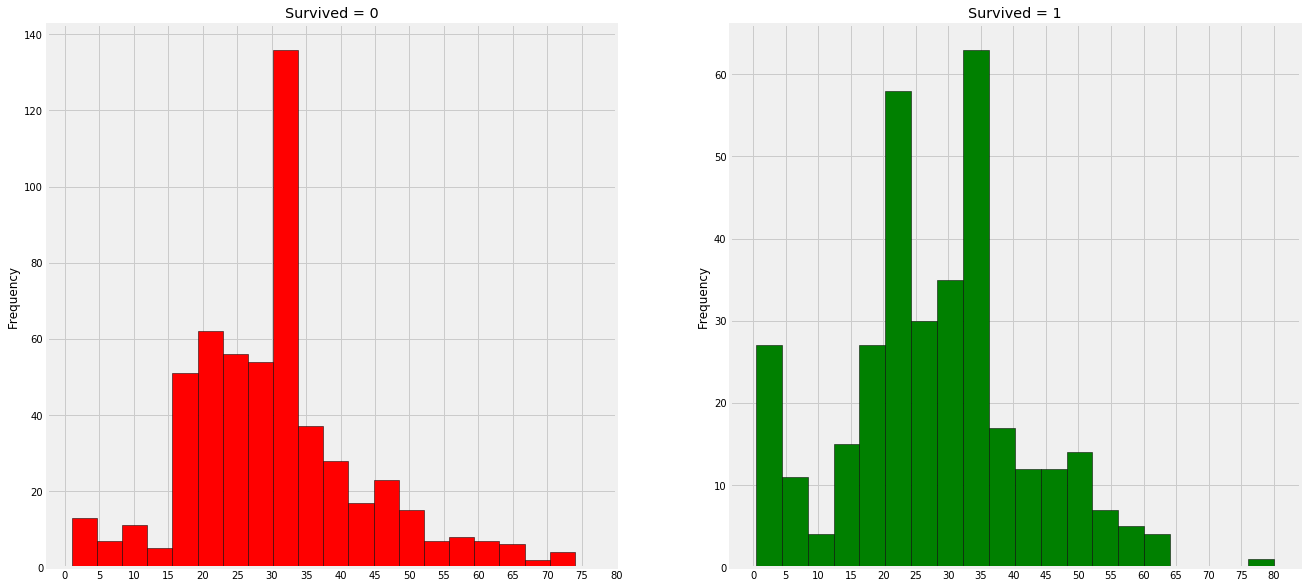

In [20]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor = 'black',color = 'red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor = 'black',color = 'green')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

어린아이(5세 이하)는 많이 구출 되었다. -> 여자와 아이를 먼저 구한 사실을 알 수 있다.

가장 나이가 많은 승객도 구출되었다.

가장 사망률이 높은 나이 구간은 30~40이다.

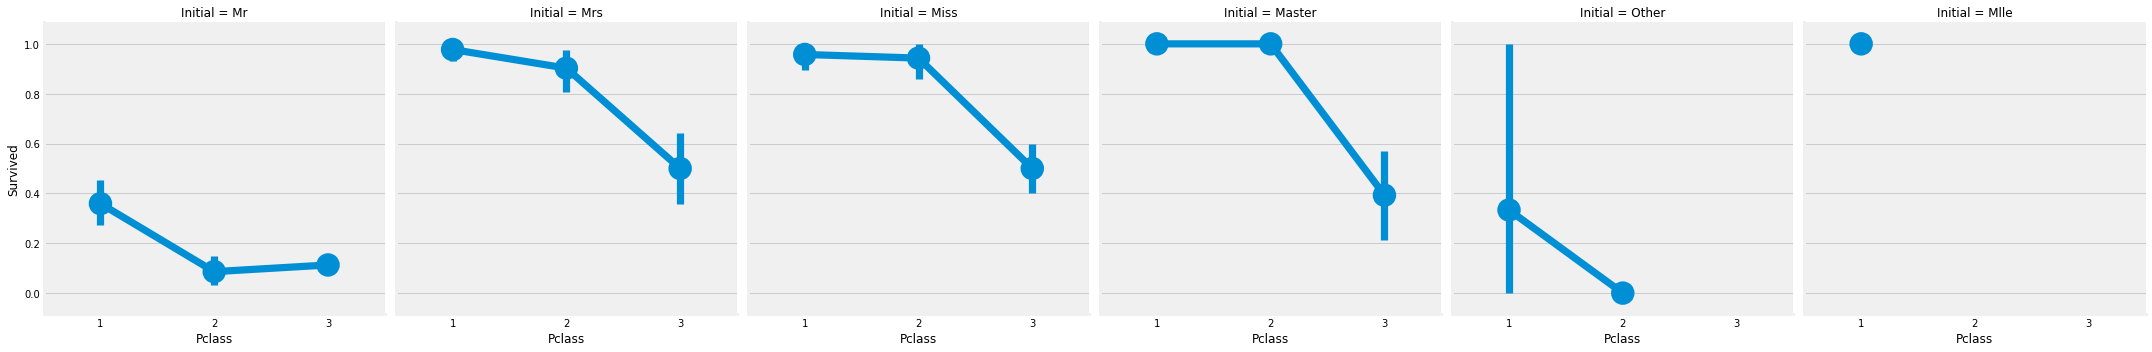

In [21]:
sns.factorplot('Pclass','Survived',col = 'Initial',data=data)
plt.show()

### Categorical Data
    
    5.Embarked

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

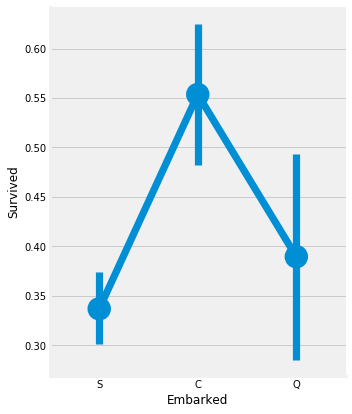

In [23]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()  #현재 객체 불러오기
fig.set_size_inches(5,6)  #크기 조절
plt.show()

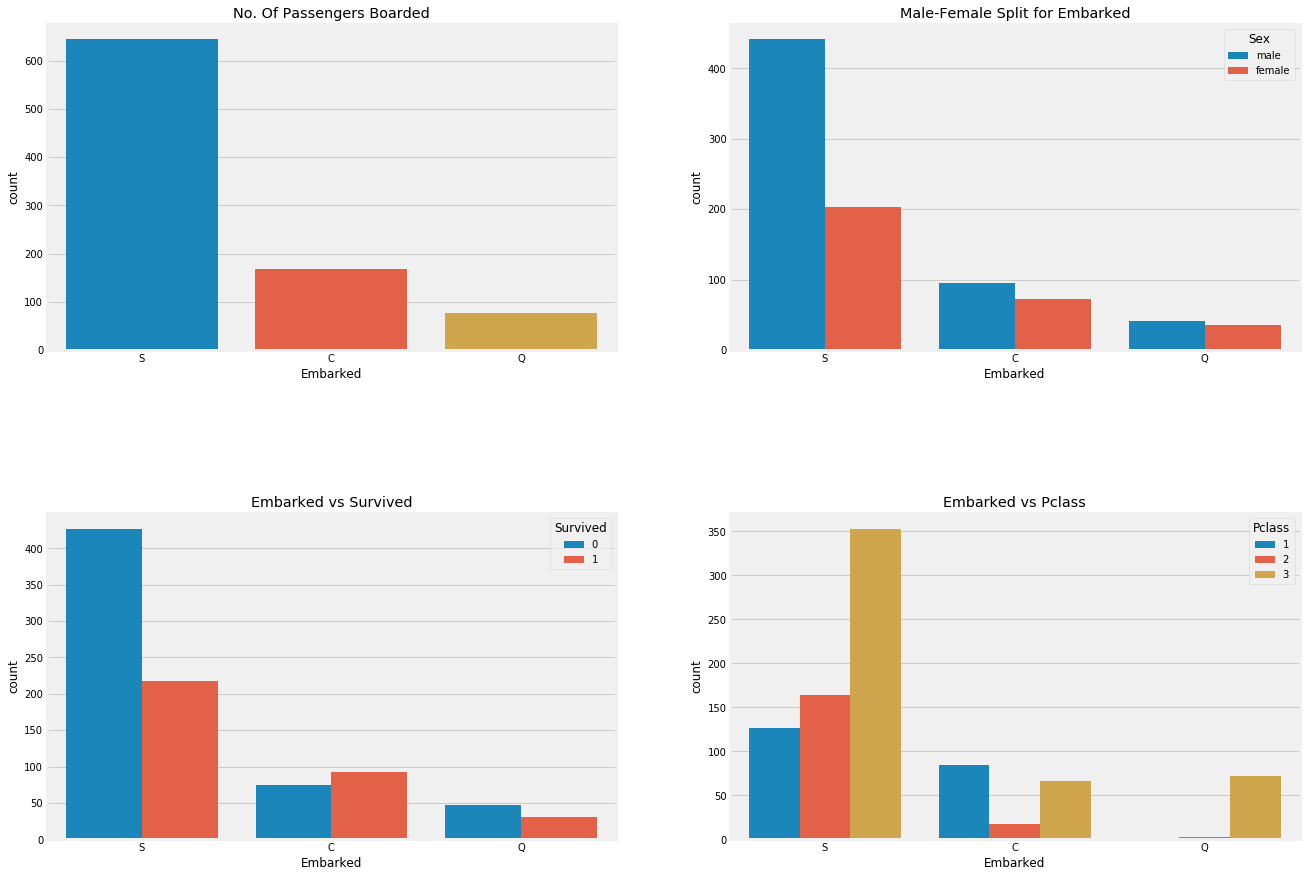

In [24]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data = data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue = 'Sex',data = data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue = 'Survived',data = data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue = 'Pclass',data = data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)  #subplot간의 간격 조절
plt.show()

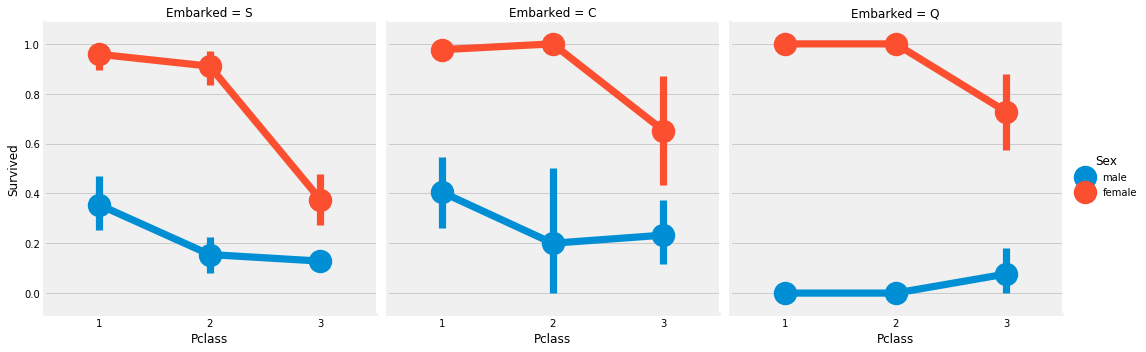

In [25]:
sns.factorplot('Pclass','Survived',hue = 'Sex',col = 'Embarked',data = data)
plt.show()

Embarked 결측 채우기 : 가장 많은 탑승객이 S에서 승선했기 때문에 NaN을 S로 채운다

In [27]:
data['Embarked'].fillna('S',inplace = True)  #fillna 함수 : 결측치를 채우는 함수. inplace = True를 적용한다면 다른 객체를 반환하지 않고 기존 표를 수정 

In [28]:
data.Embarked.isnull().any()  #결측치 존재 확인

False

### SibSip

    sibling = brother, sister, stepbrother, stepsister
    
    spouse = husband, wife

In [32]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


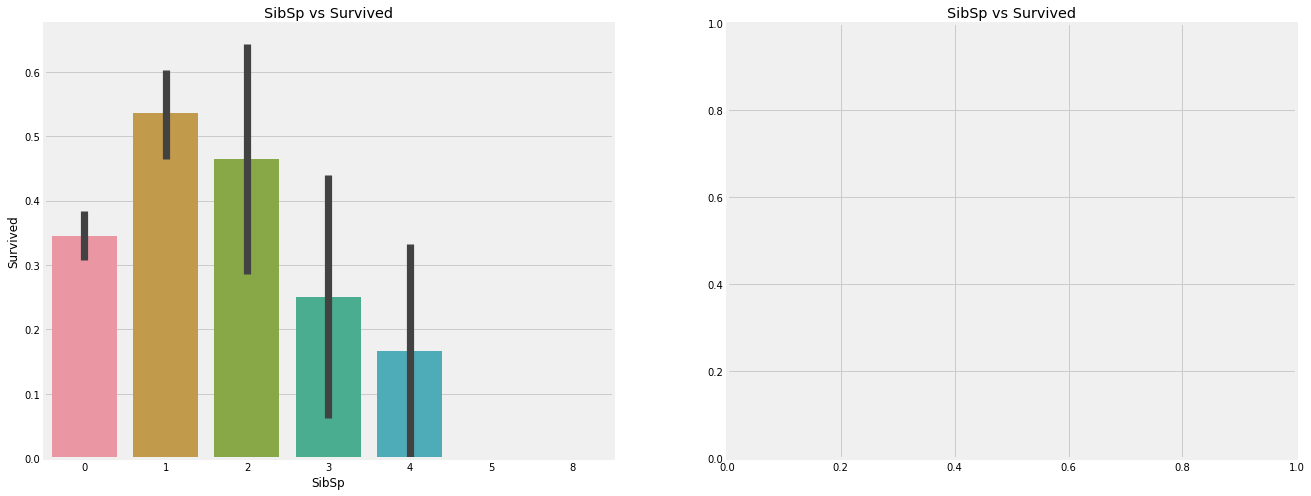

In [35]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot('SibSp','Survived',data = data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [36]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch (family)

In [37]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Pclass : 3인 경우 대가족이 많다.

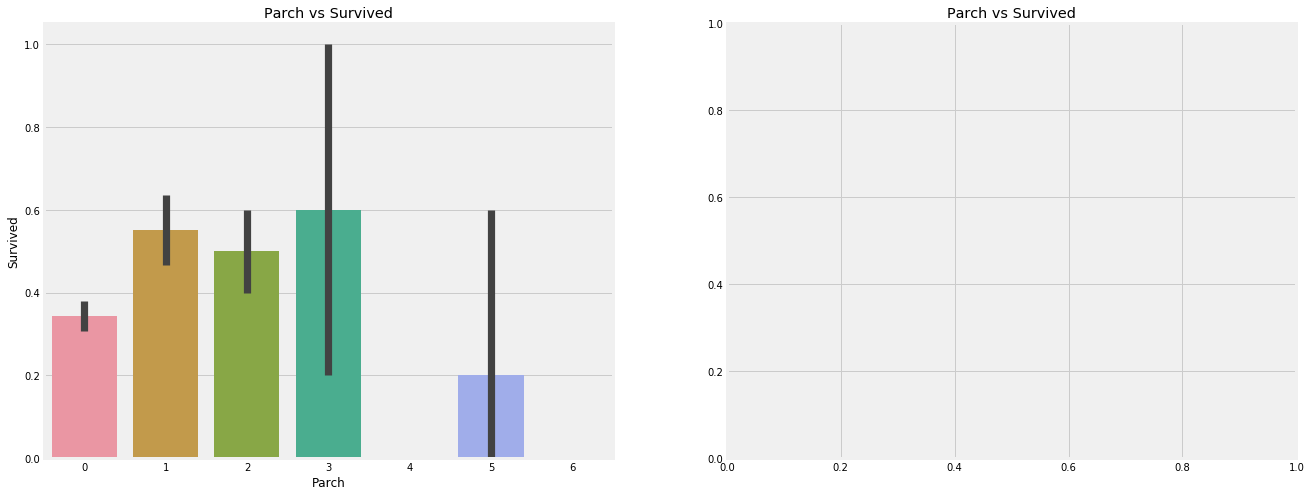

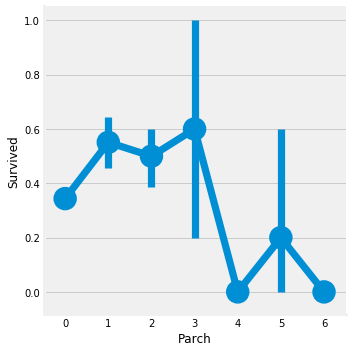

In [40]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot('Parch','Survived',data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

### Fare (continous Feature)

In [42]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


Text(0.5, 1.0, 'Fares in Pclass 3')

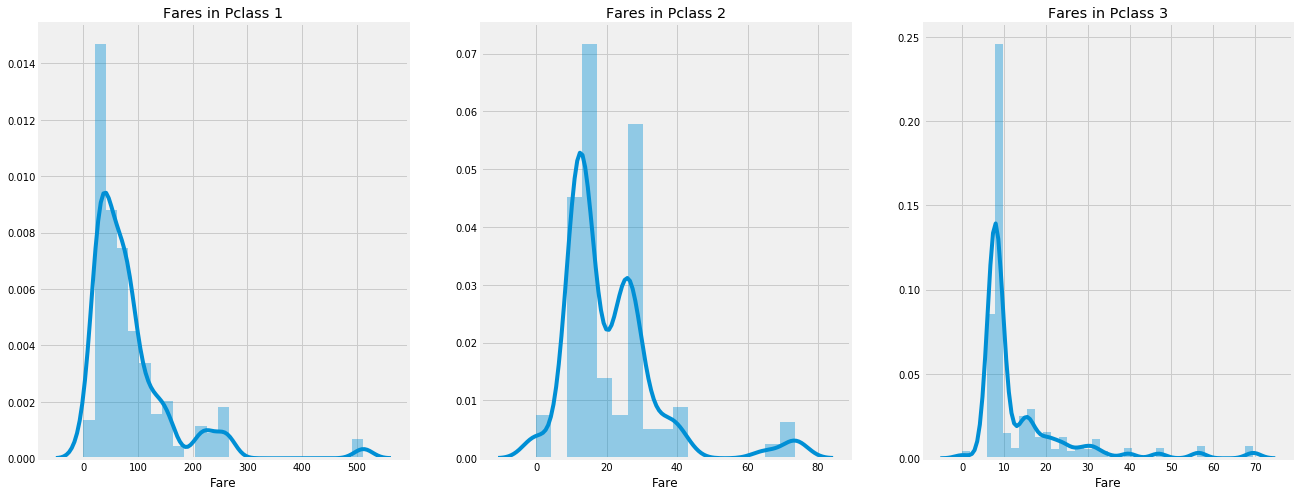

In [44]:
f, ax = plt.subplots(1,3,figsize = (20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])  #러그 + 밀도함수. Pclass가 1인 Fare data
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])  #러그 + 밀도함수
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])  #러그 + 밀도함수
ax[2].set_title('Fares in Pclass 3')

### Observation for all features

Sex : men < women suverved rate

Pclass : 1 > 2 > 3

Age : Children have a high chance of survival. 15~35 death rate is highest

Embarked : C have a high chance of survival even though most of Pclass 1 people aboarded on S

Parch + SibSp : having 1~2 sibsp or 1~3 parents shows greater chance of probability rather than being alone or having a larger family

### Correlation Between The Features

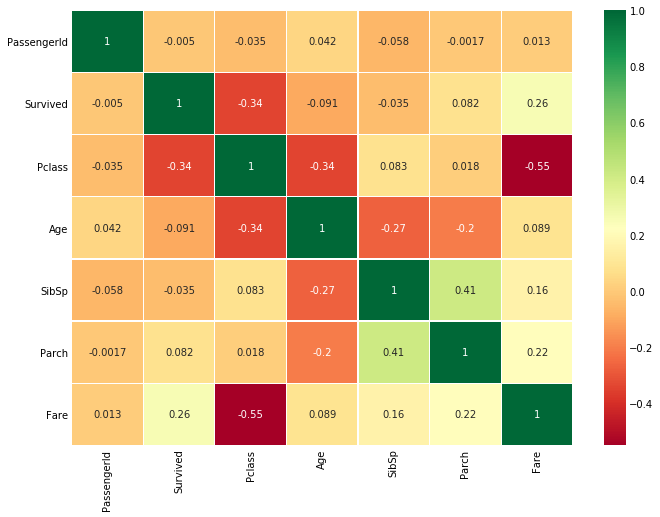

In [47]:
sns.heatmap(data.corr(),annot = True, cmap = 'RdYlGn', linewidths = 0.2)  #annot : 셀 별로 계술 표시
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### heatmap

: 숫자들의 상관관계만 표시할 수 있다. 문자와는 비교가 불가능(별도의 전처리 과정이 필수)

Positive Correlation : 비례관계. 1에 가까울수록 완벽하게 비례한다고 생각할 수 있다.

Negative Correlation : 반비례관계, -1에 가까울수록 완벽하게 반비례한다고 생각할 수 있다.

MultiColinearity (다중공선성) : Correlation이 1이나 -1에 거의 가까운 경우 두 지표는 MultiColinearity라고 한다. 둘의 데이터가 거의 유사하다는 것을 의미한다. 

--> 이런경우 하나의 지표를 제거해준다. training time을 줄일 수 있고, 만약 포함하더라도 장점이 거의 없기 때문.

이 data의 경우 correlation이 높은 지표들이 없다. (higest correlation : 0.41) --> 모든 지표 사용